# Condo Price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split , cross_val_predict , RandomizedSearchCV
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import *
from sklearn.pipeline import Pipeline

In [3]:
train = pd.read_csv('Condo_Train.csv')
train.head()

,unit_id,price,area,Bed,bath,floor,project_id,project_name,project_la,project_lng,...,project_total_unit,project_cam_fee,completion_year,project_sold_PricePerArea,project_distance_to_main_transportation,min_price_in_project,max_price_in_project,project_price_per_sqm,unit_price_per_sqm,listed_for
0,1684,2500000,34,1.0,1.0,7,12947,Zenith Place Sukhumvit 71,13.712663,100.595581,...,134,NaN,2010,"71,642",0.55,2500000,3500000,"73,529",73529.41,1 Year
1,2683,3500000,4216,1.0,1.0,3,12947,Zenith Place Sukhumvit 71,13.712663,100.595581,...,134,NaN,2010,"71,642",0.55,2500000,3500000,"73,529",83017.08,7 Month
2,2762,3650000,37,1.0,1.0,7,12948,Zenith Place Sukhumvit 42,13.716089,100.586220,...,281,35.0,2013,"80,811",0.40,3490000,3690000,"102,500",98648.65,11 Month
3,2774,3690000,36,1.0,1.0,4,12948,Zenith Place Sukhumvit 42,13.716089,100.586220,...,281,35.0,2013,"80,811",0.40,3490000,3690000,"102,500",102500.00,2 Year
4,4883,2400000,34,1.0,1.0,6,12949,Zenith Place Huaykwang,13.777063,100.579254,...,126,25.0,2009,NaN,0.63,2400000,2800000,"70,588",70588.24,3 Month


In [4]:
test = pd.read_csv('Condo_Test.csv')
test.head()

,unit_id,area,Bed,bath,floor,project_id,project_name,project_la,project_lng,Region,...,project_total_unit,project_cam_fee,completion_year,project_sold_PricePerArea,project_distance_to_main_transportation,min_price_in_project,max_price_in_project,project_price_per_sqm,unit_price_per_sqm,listed_for
0,13,28,1.0,1.0,4,14442,Unio Charan 3,13.732420,100.467308,bangkok,...,1932,35.0,2017,59950.0,0.81,1290000,1990000,46071,53214.29,1 Year
1,21,42,1.0,1.0,2,13815,Lot 29 Condominium,13.793100,100.559219,bangkok,...,114,NaN,2006,NaN,1.03,500000,1490000,20000,35476.19,1 Year
2,22,23,0.0,1.0,5,16829,Ease Ratchada Condominium,13.817719,100.579585,bangkok,...,108,NaN,2009,NaN,1.45,1490000,2200000,64706,64782.61,4 Month
3,24,2824,1.0,1.0,4,767,The Niche ID Serithai,13.797985,100.694862,bangkok,...,455,38.0,2016,NaN,0.00,1390000,2300000,49643,53009.92,1 Month
4,28,2625,1.0,1.0,21,14630,Lumpini Park Phetkasem 98,13.708920,100.383087,bangkok,...,2672,30.0,2017,69130.0,0.00,1050000,2590000,46276,57104.76,51 Year


In [5]:
train.shape

(4167, 22)

In [6]:
test.shape

(1072, 21)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   unit_id                                  4167 non-null   int64  
 1   price                                    4167 non-null   int64  
 2   area                                     4167 non-null   object 
 3   Bed                                      4167 non-null   float64
 4   bath                                     4167 non-null   float64
 5   floor                                    4167 non-null   int64  
 6   project_id                               4167 non-null   int64  
 7   project_name                             4167 non-null   object 
 8   project_la                               4167 non-null   float64
 9   project_lng                              4167 non-null   float64
 10  Region                                   4167 no

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   unit_id                                  1072 non-null   int64  
 1   area                                     1072 non-null   int64  
 2   Bed                                      1072 non-null   float64
 3   bath                                     1072 non-null   float64
 4   floor                                    1072 non-null   int64  
 5   project_id                               1072 non-null   int64  
 6   project_name                             1072 non-null   object 
 7   project_la                               1072 non-null   float64
 8   project_lng                              1072 non-null   float64
 9   Region                                   1072 non-null   object 
 10  Sub District                             1072 no

**ตรวจสอบข้อมูลเบื้องต้น**

**train data set กับ test data set มี columns ที่เหมือนกันแต่ data type ต่างกัน**

In [9]:
train['area'] = train['area'].str.replace('\D' , '').astype(int)

In [10]:
train['project_sold_PricePerArea'] = train['project_sold_PricePerArea'][train['project_sold_PricePerArea'].notna()].str.replace('\D' , '').astype(int)

In [11]:
train['project_price_per_sqm'] = train['project_price_per_sqm'].str.replace('\D' , '').astype(int)

In [12]:
df = pd.concat([train , test]).reset_index().drop('index' , axis=1)
df

,unit_id,price,area,Bed,bath,floor,project_id,project_name,project_la,project_lng,...,project_total_unit,project_cam_fee,completion_year,project_sold_PricePerArea,project_distance_to_main_transportation,min_price_in_project,max_price_in_project,project_price_per_sqm,unit_price_per_sqm,listed_for
0,1684,2500000.0,34,1.0,1.0,7,12947,Zenith Place Sukhumvit 71,13.712663,100.595581,...,134,NaN,2010,71642.0,0.55,2500000,3500000,73529,73529.41,1 Year
1,2683,3500000.0,4216,1.0,1.0,3,12947,Zenith Place Sukhumvit 71,13.712663,100.595581,...,134,NaN,2010,71642.0,0.55,2500000,3500000,73529,83017.08,7 Month
2,2762,3650000.0,37,1.0,1.0,7,12948,Zenith Place Sukhumvit 42,13.716089,100.586220,...,281,35.0,2013,80811.0,0.40,3490000,3690000,102500,98648.65,11 Month
3,2774,3690000.0,36,1.0,1.0,4,12948,Zenith Place Sukhumvit 42,13.716089,100.586220,...,281,35.0,2013,80811.0,0.40,3490000,3690000,102500,102500.00,2 Year
4,4883,2400000.0,34,1.0,1.0,6,12949,Zenith Place Huaykwang,13.777063,100.579254,...,126,25.0,2009,NaN,0.63,2400000,2800000,70588,70588.24,3 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,5217,NaN,35,1.0,1.0,3,14520,A Space Sukhumvit 77,13.713789,100.633904,...,1561,NaN,2007,45429.0,1.13,1301000,2054000,41429,42857.14,10 Month
5235,5220,NaN,261,1.0,1.0,8,14157,Ease Rama 2,13.669389,100.436172,...,480,40.0,2015,54491.0,0.00,1,3000000,57471,57471.26,1 Month
5236,5226,NaN,3161,1.0,1.0,5,14481,Metro Park Sathorn,13.709816,100.450432,...,285,25.0,2007,33621.0,0.00,1090000,3500000,31996,47453.34,1 Year
5237,5227,NaN,3163,1.0,1.0,6,14481,Metro Park Sathorn,13.709816,100.450432,...,285,25.0,2007,33621.0,0.00,1090000,3500000,31996,47423.33,1 Year


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239 entries, 0 to 5238
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   unit_id                                  5239 non-null   int64  
 1   price                                    4167 non-null   float64
 2   area                                     5239 non-null   int64  
 3   Bed                                      5239 non-null   float64
 4   bath                                     5239 non-null   float64
 5   floor                                    5239 non-null   int64  
 6   project_id                               5239 non-null   int64  
 7   project_name                             5239 non-null   object 
 8   project_la                               5239 non-null   float64
 9   project_lng                              5239 non-null   float64
 10  Region                                   5239 no

In [14]:
df.drop('price' , axis=1).isna().sum()

unit_id                                       0
area                                          0
Bed                                           0
bath                                          0
floor                                         0
project_id                                    0
project_name                                  0
project_la                                    0
project_lng                                   0
Region                                        0
Sub District                                  0
project_total_unit                            0
project_cam_fee                            1460
completion_year                               0
project_sold_PricePerArea                  1142
project_distance_to_main_transportation       0
min_price_in_project                          0
max_price_in_project                          0
project_price_per_sqm                         0
unit_price_per_sqm                            0
listed_for                              

**ตรวจสอบ Missing Values**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_id,5239.0,2.620000e+03,1.512513e+03,1.000000e+00,1.310500e+03,2.620000e+03,3.929500e+03,5.239000e+03
price,4167.0,4.023139e+06,4.055912e+06,1.490000e+06,2.100000e+06,2.850000e+06,4.500000e+06,7.400000e+07
area,5239.0,1.800118e+03,4.789919e+03,2.000000e+01,3.500000e+01,2.850000e+02,3.026000e+03,2.414520e+05
Bed,5239.0,1.047337e+00,6.262460e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
bath,5239.0,1.141726e+00,4.068474e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
floor,5239.0,1.187040e+01,1.904491e+01,0.000000e+00,5.000000e+00,8.000000e+00,1.700000e+01,1.234000e+03
project_id,5239.0,1.249630e+04,4.911919e+03,6.200000e+02,1.309000e+04,1.409400e+04,1.473700e+04,1.773800e+04
project_la,5239.0,1.374846e+01,5.459979e-02,1.364711e+01,1.371029e+01,1.373763e+01,1.378872e+01,1.394331e+01
project_lng,5239.0,1.005622e+02,6.192886e-02,1.003831e+02,1.005319e+02,1.005711e+02,1.006035e+02,1.007962e+02
project_total_unit,5239.0,7.223205e+02,5.688984e+02,0.000000e+00,3.000000e+02,5.780000e+02,9.315000e+02,4.000000e+03


**ดูการกระจายตัวของแต่ละคุณสมบัติ**

In [16]:
df['project_cam_fee'] = df['project_cam_fee'].fillna(df['project_cam_fee'].median())

In [17]:
df['project_sold_PricePerArea'] = df['project_sold_PricePerArea'].fillna(df['project_sold_PricePerArea'].median())

**แทนค่าว่างด้วย median**

In [18]:
df.drop('price' , axis=1).isna().sum()

unit_id                                    0
area                                       0
Bed                                        0
bath                                       0
floor                                      0
project_id                                 0
project_name                               0
project_la                                 0
project_lng                                0
Region                                     0
Sub District                               0
project_total_unit                         0
project_cam_fee                            0
completion_year                            0
project_sold_PricePerArea                  0
project_distance_to_main_transportation    0
min_price_in_project                       0
max_price_in_project                       0
project_price_per_sqm                      0
unit_price_per_sqm                         0
listed_for                                 0
dtype: int64

In [19]:
df.columns

Index(['unit_id', 'price', 'area', 'Bed', 'bath', 'floor', 'project_id',
       'project_name', 'project_la', 'project_lng', 'Region', 'Sub District',
       'project_total_unit', 'project_cam_fee', 'completion_year',
       'project_sold_PricePerArea', 'project_distance_to_main_transportation',
       'min_price_in_project', 'max_price_in_project', 'project_price_per_sqm',
       'unit_price_per_sqm', 'listed_for'],
      dtype='object')

In [20]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Distribution of Condo Price')

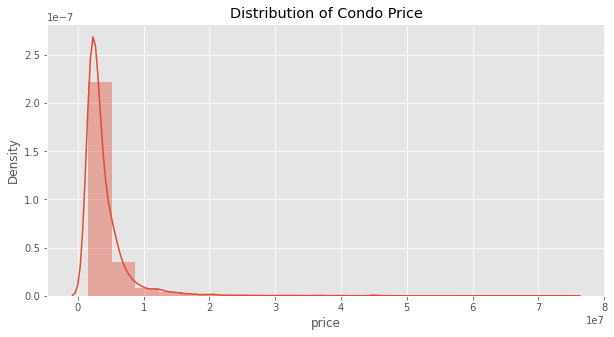

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(train['price'] , bins=20)
plt.title('Distribution of Condo Price')

**การกระจายตัวของราคาคอนโด**

Text(0.5, 1.0, 'Price vs. Sub District')

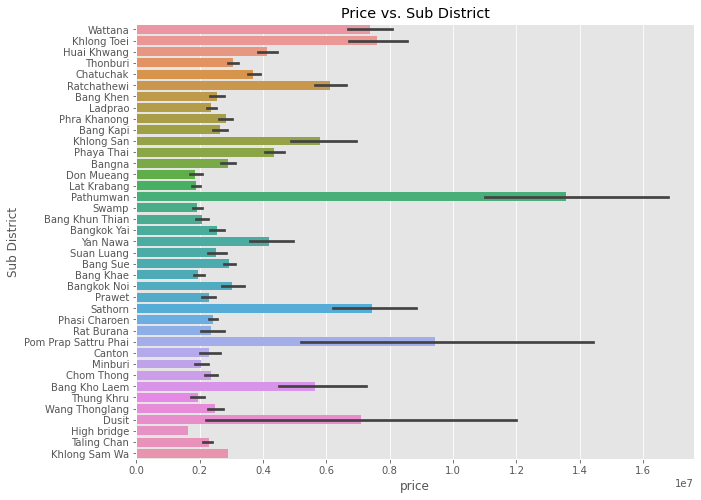

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=train , y='Sub District' , x='price')
plt.title('Price vs. Sub District')

**ราคาของคอนโดโดยเฉลี่ย ในแต่ละเขต**

**เขต Pathumwan มีราคาของคอนโดโดยเฉลี่ยสูงกว่าเขตอื่นๆ รองลงมาคือเขต Pom Prap Sattru Phai**

In [23]:
lis_cate = ['Bed' , 'bath']
lis_num =  ['area' , 'floor' , 'project_total_unit' , 'project_cam_fee' , 'completion_year' , 'project_sold_PricePerArea' , 
            'project_distance_to_main_transportation','min_price_in_project', 'max_price_in_project', 'project_price_per_sqm','unit_price_per_sqm']

In [24]:
def cate_distribution(col) :
    sns.barplot(data=train , x=col , y='price')
    plt.title(col)
    plt.show()

In [25]:
def num_distribution(col) :
    sns.distplot(train[col] , bins=20)
    plt.title(col)
    plt.show()

In [26]:
def lmplot_price(col) :
    sns.lmplot(data=train , x='price' , y=col)

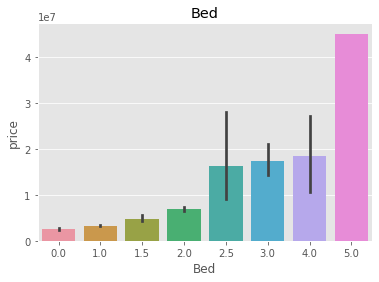

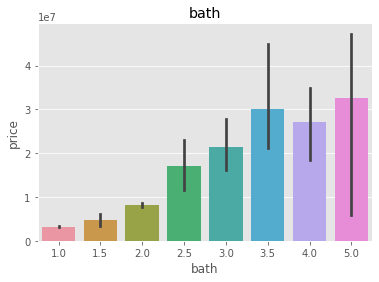

In [27]:
for col in lis_cate :
    cate_distribution(col)
    plt.show()

**ราคาของคอนโด เมื่อเทียบกับจำนวนห้องน้ำและห้องนอน**

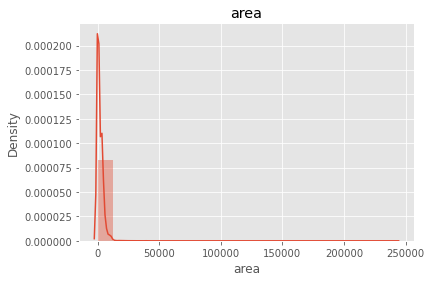

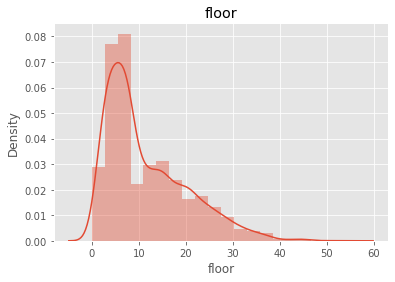

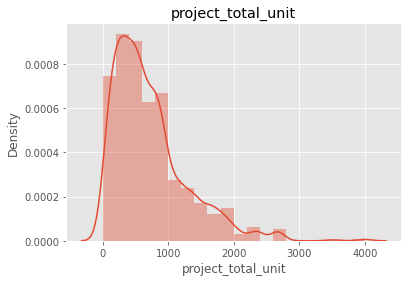

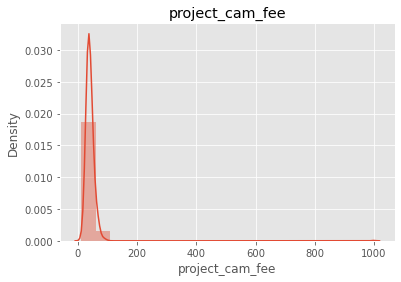

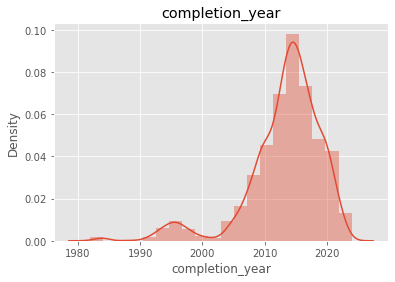

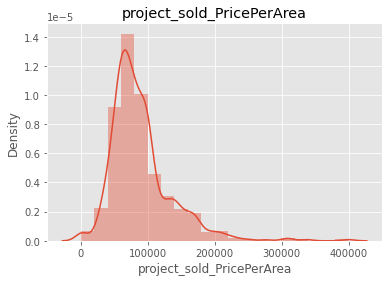

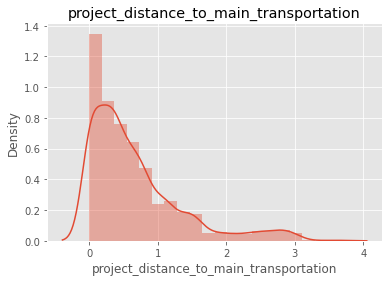

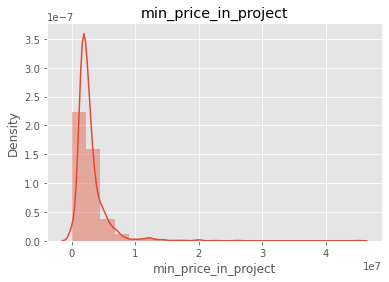

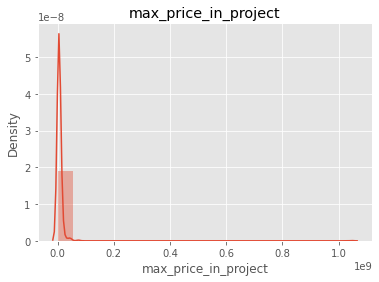

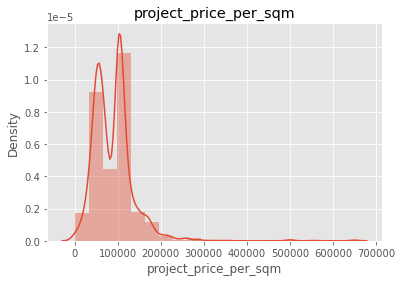

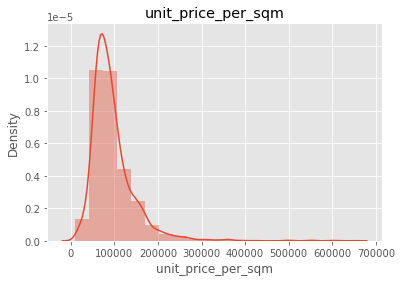

In [28]:
for col in lis_num :
        num_distribution(col)

**การกระจายตัวของแต่ละคุณสมบัติ**

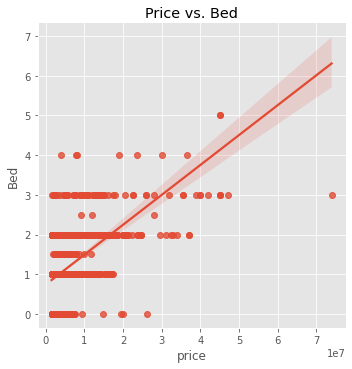

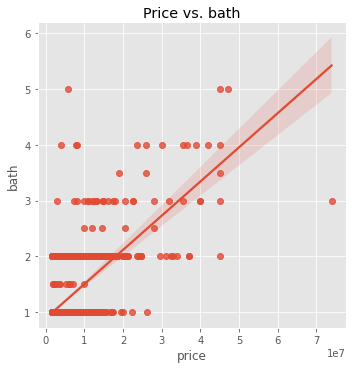

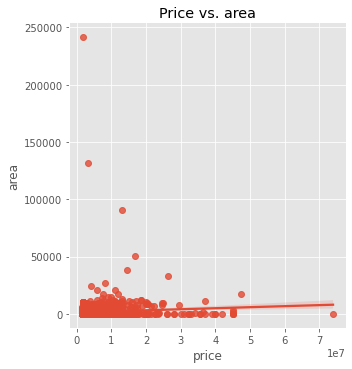

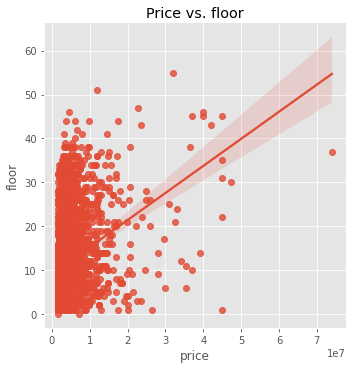

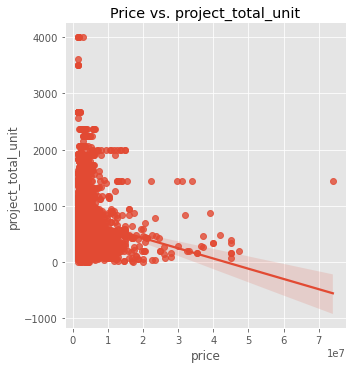

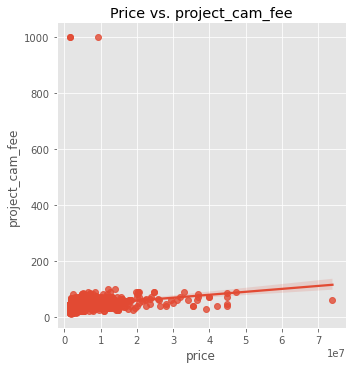

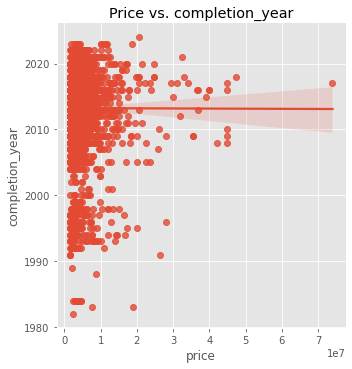

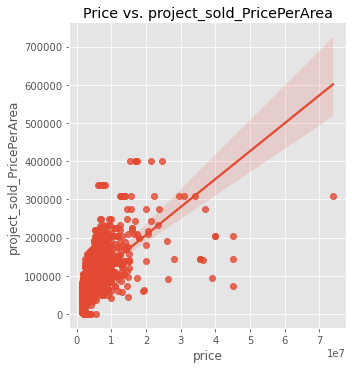

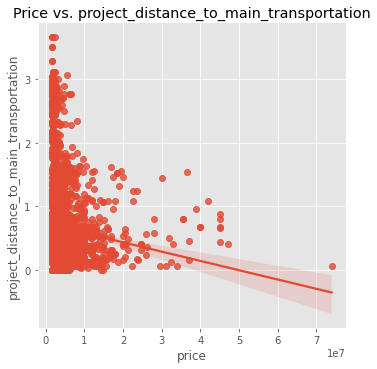

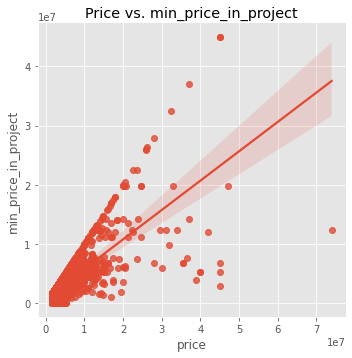

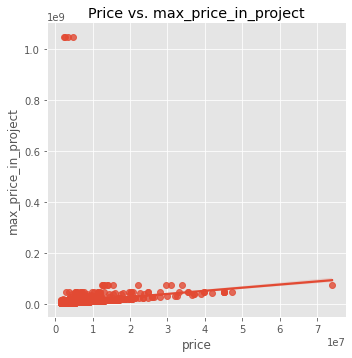

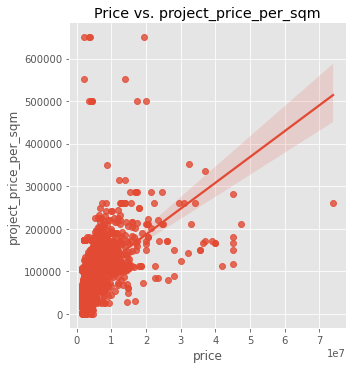

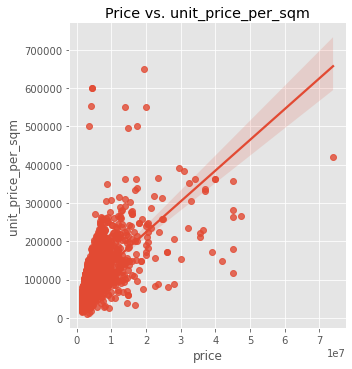

In [29]:
for col in lis_cate + lis_num :
    lmplot_price(col)
    plt.title(f'Price vs. {col}')

**ความสัมพันธ์ระหว่าง ราคาของคอนโด กับคุณสมบัติต่างๆ**

<AxesSubplot:>

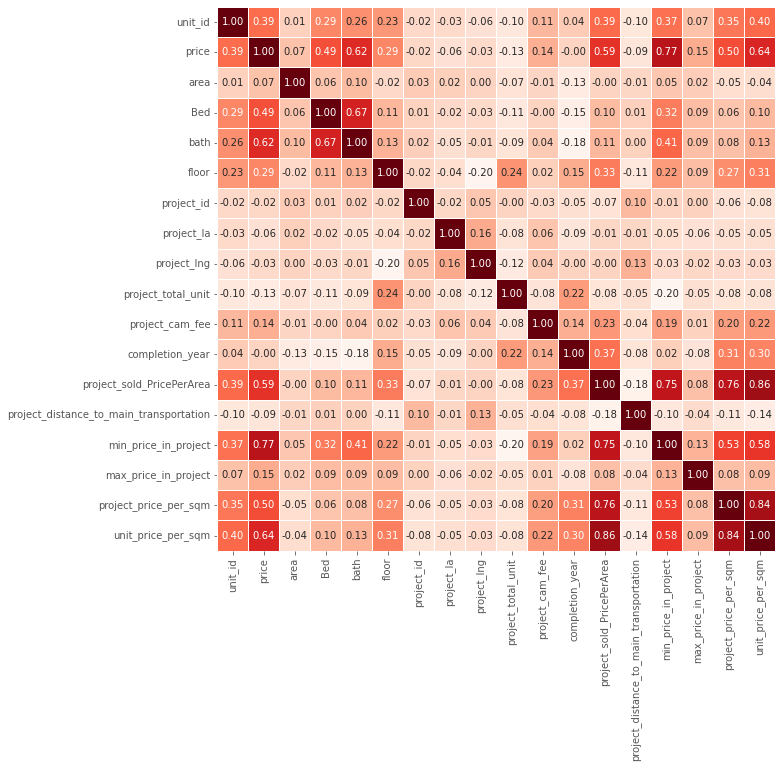

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr() , annot=True , fmt='.2f' , cmap='Reds'  , cbar=False , linewidths=1)

**ความสัมพันธ์ของแต่ละคุณสมบัติ**

**โดย min_price_in_project มีความสัมพันธ์แบบแปรผันกับ ราคาของคอนโด มากที่สุด**

In [31]:
train.columns

Index(['unit_id', 'price', 'area', 'Bed', 'bath', 'floor', 'project_id',
       'project_name', 'project_la', 'project_lng', 'Region', 'Sub District',
       'project_total_unit', 'project_cam_fee', 'completion_year',
       'project_sold_PricePerArea', 'project_distance_to_main_transportation',
       'min_price_in_project', 'max_price_in_project', 'project_price_per_sqm',
       'unit_price_per_sqm', 'listed_for'],
      dtype='object')

In [32]:
features = ['area', 'Bed', 'bath', 'floor','Sub District', 'project_total_unit', 'project_cam_fee','project_sold_PricePerArea', 'project_distance_to_main_transportation',
       'min_price_in_project', 'max_price_in_project', 'project_price_per_sqm', 'unit_price_per_sqm']
target = ['price']

In [33]:
final_df = df.copy()

In [34]:
final_df = final_df[features]
final_df.head()

,area,Bed,bath,floor,Sub District,project_total_unit,project_cam_fee,project_sold_PricePerArea,project_distance_to_main_transportation,min_price_in_project,max_price_in_project,project_price_per_sqm,unit_price_per_sqm
0,34,1.0,1.0,7,Wattana,134,38.0,71642.0,0.55,2500000,3500000,73529,73529.41
1,4216,1.0,1.0,3,Wattana,134,38.0,71642.0,0.55,2500000,3500000,73529,83017.08
2,37,1.0,1.0,7,Khlong Toei,281,35.0,80811.0,0.40,3490000,3690000,102500,98648.65
3,36,1.0,1.0,4,Khlong Toei,281,35.0,80811.0,0.40,3490000,3690000,102500,102500.00
4,34,1.0,1.0,6,Huai Khwang,126,25.0,79714.0,0.63,2400000,2800000,70588,70588.24


In [35]:
final_df.shape

(5239, 13)

In [36]:
dum_sub = final_df['Sub District'].str.get_dummies()
dum_sub.head()

,Bang Kapi,Bang Khae,Bang Khen,Bang Kho Laem,Bang Khun Thian,Bang Sue,Bangkok Noi,Bangkok Yai,Bangna,Canton,...,Ratchathewi,Sathorn,Suan Luang,Swamp,Taling Chan,Thonburi,Thung Khru,Wang Thonglang,Wattana,Yan Nawa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**แปลงชื่อเขตเป็นตัวเลข**

In [37]:
final_df = pd.concat([final_df , dum_sub] , axis=1)
final_df = final_df.drop('Sub District' , axis=1)
final_df.head()

,area,Bed,bath,floor,project_total_unit,project_cam_fee,project_sold_PricePerArea,project_distance_to_main_transportation,min_price_in_project,max_price_in_project,...,Ratchathewi,Sathorn,Suan Luang,Swamp,Taling Chan,Thonburi,Thung Khru,Wang Thonglang,Wattana,Yan Nawa
0,34,1.0,1.0,7,134,38.0,71642.0,0.55,2500000,3500000,...,0,0,0,0,0,0,0,0,1,0
1,4216,1.0,1.0,3,134,38.0,71642.0,0.55,2500000,3500000,...,0,0,0,0,0,0,0,0,1,0
2,37,1.0,1.0,7,281,35.0,80811.0,0.40,3490000,3690000,...,0,0,0,0,0,0,0,0,0,0
3,36,1.0,1.0,4,281,35.0,80811.0,0.40,3490000,3690000,...,0,0,0,0,0,0,0,0,0,0
4,34,1.0,1.0,6,126,25.0,79714.0,0.63,2400000,2800000,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(train.shape)
print(test.shape)

(4167, 22)
(1072, 21)


In [39]:
x_train = final_df.iloc[ : 4167]
x_test = final_df.iloc[4167 :]
y_train = train[target]

**แบ่ง train data set กับ test data set ออกจากกัน**

In [40]:
x_train , x_validation , y_train , y_validation = train_test_split(x_train , y_train , test_size=0.15 , shuffle=True , random_state=55)

In [41]:
print(x_train.shape)
print(x_validation.shape)

(3541, 51)
(626, 51)


**แบ่งข้อมูลออกมาจาก train data set เป็น validation data set ไว้ตรวจสอบ**

In [42]:
lis_model_score = []

def modeling(model) :
    pipe = Pipeline([
        ('scaling' , StandardScaler()) , 
        ('model' , model)
    ])
    
    prediction = cross_val_predict(pipe , x_train , y_train , cv=5)
    lis_model_score.append([
        model ,
        r2_score(prediction , y_train).round(4) , 
        mean_absolute_error(prediction , y_train).round(2) ,
        np.sqrt(mean_squared_error(prediction , y_train)).round(2)
    ])

**นำ Algorithm ต่างๆ มาฝึกเพื่อดูประสิทธิภาพเบื้องต้น**

In [43]:
lis_algorithm = [Ridge() , Lasso() , ElasticNet() , RandomForestRegressor() , GradientBoostingRegressor() , ExtraTreesRegressor() ,
                KNeighborsRegressor() , DecisionTreeRegressor() , XGBRegressor()]

In [44]:
for model in lis_algorithm :
    modeling(model)

In [45]:
result = pd.DataFrame(lis_model_score , columns=['Model' , 'R2 score' , 'MAE score' , 'RMSE score']).sort_values('MAE score')
result

,Model,R2 score,MAE score,RMSE score
8,"XGBRegressor(base_score=None, booster=None, co...",0.9067,339564.26,1150965.21
5,ExtraTreesRegressor(),0.9032,391409.68,1153682.85
3,RandomForestRegressor(),0.8742,418258.79,1284275.98
4,GradientBoostingRegressor(),0.8993,478005.00,1192232.60
7,DecisionTreeRegressor(),0.7385,560161.12,2137021.66
6,KNeighborsRegressor(),0.4550,802366.16,2123944.14
2,ElasticNet(),0.5648,880390.29,2027895.13
0,Ridge(),0.7586,900726.18,1827427.44
1,Lasso(),0.7587,901125.29,1827494.27


**จากการฝึกเบื้องต้น XGBRegressor กับ ExtraTreesRegressor ให้ผลลัพธ์ที่ใกล้เคียงกัน**

**นำทั้ง 2 Algorithm ไปปรับแต่ง parameter เพิ่มเติม เพื่อเปรียบเทียบประสิทธิภาพของโมเดล**

In [46]:
pipe_extratree = Pipeline([
    ('scaling' , StandardScaler()) , 
    ('model' , ExtraTreesRegressor())
])

pipe_xgboost = Pipeline([
    ('scaling' , StandardScaler()) , 
    ('model' , XGBRegressor())
])

In [47]:
scv_extratree = RandomizedSearchCV(pipe_extratree , 
                              dict(model__n_estimators=[100,150,200] , model__max_depth=[2,4,6] , 
                                   model__min_samples_split=[2,4,6] , model__min_samples_leaf=[1,2]) , 
                              n_jobs=-1 , verbose=1 , cv=5)

scv_xgboost = RandomizedSearchCV(pipe_xgboost , 
                           dict(model__n_estimators=[100,150,200] , model__learning_rate=[0.01,0.05,0.1] ,  
                                model__max_depth=[2,4,6] ) ,
                           n_jobs=-1 , verbose=1 , cv=5)

**ใช้ RandomizedSearchCV ปรับแต่ง parameter**

In [48]:
scv_extratree.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model', ExtraTreesRegressor())]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [2, 4, 6],
                                        'model__min_samples_leaf': [1, 2],
                                        'model__min_samples_split': [2, 4, 6],
                                        'model__n_estimators': [100, 150, 200]},
                   verbose=1)

In [49]:
scv_xgboost.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           enable_categorical=False,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                  

In [50]:
print('ExtraTree Best Params')
scv_extratree.best_params_

ExtraTree Best Params


{'model__n_estimators': 200,
 'model__min_samples_split': 4,
 'model__min_samples_leaf': 1,
 'model__max_depth': 6}

**parameters ที่เหมาะสมที่สุดของ ExtraTreesRegressor**

In [51]:
print('XGBoost Best Params')
scv_xgboost.best_params_

XGBoost Best Params


{'model__n_estimators': 150,
 'model__max_depth': 4,
 'model__learning_rate': 0.1}

**parameters ที่เหมาะสมที่สุดของ XGBoost**

In [52]:
print('ExtraTree Best score =',scv_extratree.best_score_)
print('XGBoost Best score =',scv_xgboost.best_score_)

ExtraTree Best score = 0.8986638784647181
XGBoost Best score = 0.9243456181947393


In [53]:
best_extratree = scv_extratree.best_estimator_
best_xgboost = scv_xgboost.best_estimator_

In [54]:
extratree_prediction = best_extratree.predict(x_validation)
xgboost_prediction = best_xgboost.predict(x_validation)

**เปรียบเทียบประสิทธิภาพระหว่าง ExtraTreesRegressor กับ XGBoost**

In [55]:
print('ExtraTree R2 score =',r2_score(extratree_prediction , y_validation).round(4))
print('ExtraTree MAE score =',mean_absolute_error(extratree_prediction , y_validation).round(2))
print('ExtraTree RMSE score =',np.sqrt(mean_squared_error(extratree_prediction , y_validation)).round(2))

ExtraTree R2 score = 0.8481
ExtraTree MAE score = 610462.65
ExtraTree RMSE score = 1191006.11


In [56]:
print('XGBoost R2 score =',r2_score(xgboost_prediction , y_validation).round(4))
print('XGBoost MAE score =',mean_absolute_error(xgboost_prediction , y_validation).round(2))
print('XGBoost RMSE score =',np.sqrt(mean_squared_error(xgboost_prediction , y_validation)).round(2))

XGBoost R2 score = 0.8931
XGBoost MAE score = 379425.65
XGBoost RMSE score = 1128962.42


**หลังจากปรับแต่ง parameter เสร็จแล้ว XGBoost ให้ผลลัพธ์ดีที่สุด**

In [57]:
final_prediction = best_xgboost.predict(x_test)

**ขั้นตอนสุดท้าย คาดการณ์ราคาของคอนโดจาก test data set**

In [58]:
submission = pd.concat([test['unit_id'],pd.DataFrame( final_prediction , columns=['Price_Prediction'])] , axis=1)
submission

,unit_id,Price_Prediction
0,13,1575511.000
1,21,1867657.250
2,22,1465535.500
3,24,1589255.500
4,28,1510685.875
...,...,...
1067,5217,1708136.125
1068,5220,1706682.250
1069,5226,1720840.625
1070,5227,1720840.625


In [59]:
submission.to_csv('condo_submission.csv' , index=False)

In [60]:
pd.read_csv('condo_submission.csv')

,unit_id,Price_Prediction
0,13,1575511.0
1,21,1867657.2
2,22,1465535.5
3,24,1589255.5
4,28,1510685.9
...,...,...
1067,5217,1708136.1
1068,5220,1706682.2
1069,5226,1720840.6
1070,5227,1720840.6
